# Build a machine learning model to predict salary  based on position for a given dataset

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [163]:
data = pd.read_csv('/home/admin1/machine_learning/week9/Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


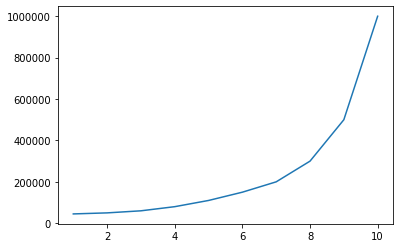

In [164]:
plt.plot(data['Level'], data['Salary'])
plt.show()

In [165]:
data.drop(['Position'], axis = 1, inplace = True)
data

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [166]:
x = data.iloc[:,0:1].values
y = data.iloc[:,-1:].values

In [167]:
#Fitting Linear Regression to  the dataset
linreg = LinearRegression()
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
#Fitting polynomial Regression
polyreg = PolynomialFeatures(degree = 4)
x_poly = polyreg.fit_transform(x)
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)
y_pred = poly_reg.predict(x_poly)
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

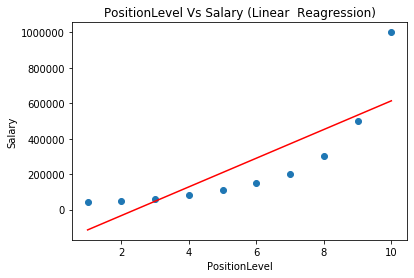

In [169]:
#Visualizing Linear Regression Model
plt.scatter(x, y)
plt.plot(x, linreg.predict(x), color = 'red')
plt.title('PositionLevel Vs Salary (Linear  Reagression)')
plt.xlabel('PositionLevel')
plt.ylabel('Salary')
plt.show()

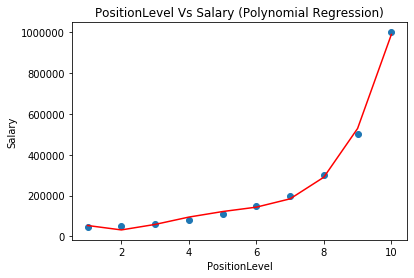

In [170]:
#Visualising Polynomial Regression Model
plt.scatter(x, y)
plt.plot(x, poly_reg.predict(x_poly), color = 'red')
plt.title('PositionLevel Vs Salary (Polynomial Regression)')
plt.xlabel('PositionLevel')
plt.ylabel('Salary')
plt.show()

In [171]:
#Testing Linear Regression with 1 input Sample

test_with_1_sample = 6
test_with_1_sample = np.reshape(test_with_1_sample, (1,-1))
linreg.predict(test_with_1_sample)

array([[289939.39393939]])

In [172]:
#Testing Polynomial Regression with 1 input Sample

test_with_1_sample = 6
test_with_1_sample = np.reshape(test_with_1_sample, (1,-1))
poly_reg.predict(polyreg.fit_transform(test_with_1_sample))

array([[143275.05827508]])

In [173]:
#Actual Output of that sample
y[5]

array([150000])

In [174]:
#Calculating the errors of polynomial Regresssion
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
rmse

14503.234909626832